In [5]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import DataReader
from datetime import datetime
plt.style.use('fivethirtyeight')

In [35]:
df = DataReader('ADBE',  'yahoo', datetime(2019,1,1), datetime(2021,4,1))

In [36]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,226.169998,219.000000,219.910004,224.570007,2784100,224.570007
2019-01-03,223.630005,215.149994,220.880005,215.699997,3663500,215.699997
2019-01-04,227.649994,217.479996,219.839996,226.190002,4043400,226.190002
2019-01-07,232.600006,227.289993,229.949997,229.259995,3638500,229.259995
2019-01-08,233.770004,228.330002,232.649994,232.679993,3685900,232.679993


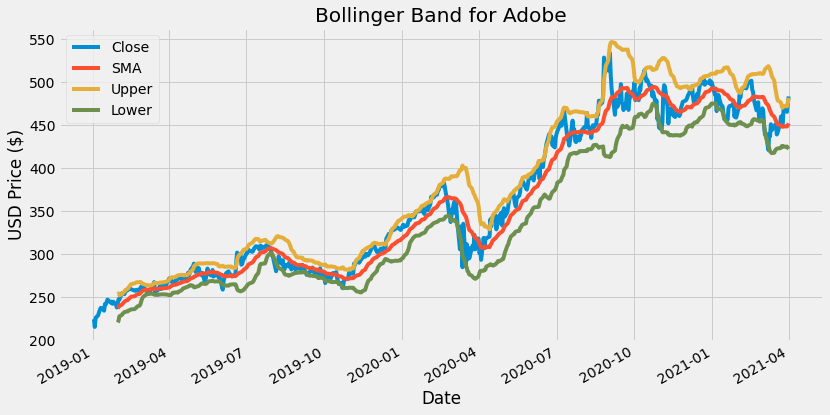

In [37]:
#Graph the data
#Get the time period (20 days)
period = 20
# Calculate the 20 Day Simple Moving Average, Std Deviation, Upper Band and Lower Band
#Calculating the Simple Moving Average
df['SMA'] = df['Close'].rolling(window=period).mean()
# Get the standard deviation
df['STD'] = df['Close'].rolling(window=period).std() 
#Calculate the Upper Bollinger Band
df['Upper'] = df['SMA'] + (df['STD'] * 2)
#Calculate the Lower Bollinger Band
df['Lower'] = df['SMA'] - (df['STD'] * 2)
#Create a list of columns to keep
column_list = ['Close', 'SMA', 'Upper', 'Lower']
df[column_list].plot(figsize=(12.2,6.4)) #Plot the data
plt.title('Bollinger Band for Adobe')
plt.ylabel('USD Price ($)')
plt.show();

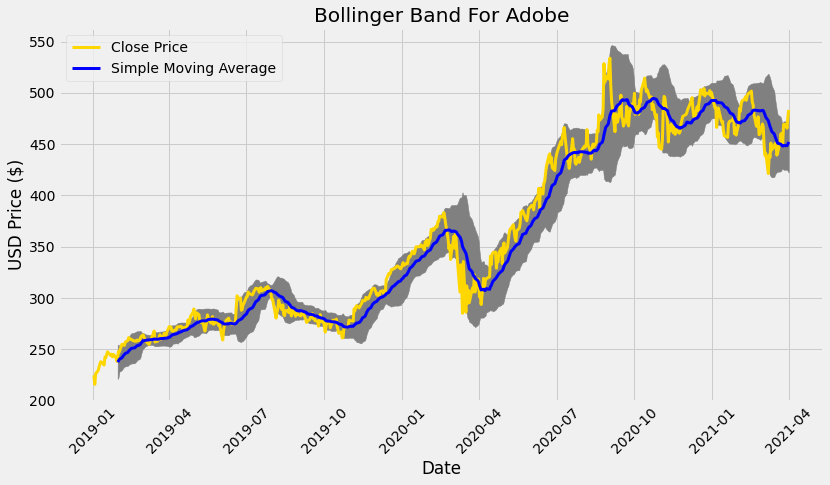

In [38]:
#Plot and shade the area between the two Bollinger bands
#Get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4)) #width = 12.2 inches and height = 6.4 inches
#Add the subplot
ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
# Get the index values of the DataFrame
x_axis = df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, df['Upper'], df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, df['Close'], color='gold', lw=3, label = 'Close Price') #lw = line width
ax.plot(x_axis, df['SMA'], color='blue', lw=3, label = 'Simple Moving Average')
# Set the Title & Show the Image
ax.set_title('Bollinger Band For Adobe')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();

In [39]:
#Create a new data frame
new_df = df[period-1:]
#Show the new data frame
new_df

,High,Low,Open,Close,Volume,Adj Close,SMA,STD,Upper,Lower
Date,,,,,,,,,,
2019-01-30,243.000000,238.869995,240.160004,242.669998,2482900,242.669998,237.460999,8.245315,253.951629,220.970370
2019-01-31,249.000000,243.000000,243.000000,247.820007,5007200,247.820007,238.623499,7.966451,254.556400,222.690598
2019-02-01,251.039993,246.100006,247.820007,247.380005,3033300,247.380005,240.207500,6.099312,252.406125,228.008875
2019-02-04,256.989990,248.059998,248.559998,254.740005,3705100,254.740005,241.635000,5.985856,253.606712,229.663288
2019-02-05,258.559998,254.009995,256.739990,254.820007,3042000,254.820007,242.913000,5.933034,254.779068,231.046933
...,...,...,...,...,...,...,...,...,...,...
2021-03-26,469.769989,449.049988,450.250000,469.089996,3614400,469.089996,448.563501,11.800897,472.165295,424.961707
2021-03-29,472.000000,462.500000,469.029999,469.320007,3141900,469.320007,448.551001,11.777584,472.106170,424.995832
2021-03-30,469.089996,461.500000,462.579987,465.459991,2436300,465.459991,448.494501,11.688868,471.872237,425.116765


In [40]:
# Create a function to get the buy and sell signals
def get_signal(data):
    buy_signal = [] #buy list
    sell_signal = [] #sell list
    for i in range(len(data['Close'])):
        if data['Close'][i] > data['Upper'][i]: #Then you should sell 
          #print('SELL')
          buy_signal.append(np.nan)
          sell_signal.append(data['Close'][i])
        elif data['Close'][i] < data['Lower'][i]: #Then you should buy
          #print('BUY')
          sell_signal.append(np.nan)
          buy_signal.append(data['Close'][i])
        else:
          buy_signal.append(np.nan)
          sell_signal.append(np.nan)
    return (buy_signal, sell_signal)

In [41]:
#Create new columns for the buy and sell signals
new_df['Buy'] =  get_signal(new_df)[0]
new_df['Sell'] =  get_signal(new_df)[1]

C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\adhar\anaconda3\envs\fintech\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
new_df

,High,Low,Open,Close,Volume,Adj Close,SMA,STD,Upper,Lower,Buy,Sell
Date,,,,,,,,,,,,
2019-01-30,243.000000,238.869995,240.160004,242.669998,2482900,242.669998,237.460999,8.245315,253.951629,220.970370,NaN,NaN
2019-01-31,249.000000,243.000000,243.000000,247.820007,5007200,247.820007,238.623499,7.966451,254.556400,222.690598,NaN,NaN
2019-02-01,251.039993,246.100006,247.820007,247.380005,3033300,247.380005,240.207500,6.099312,252.406125,228.008875,NaN,NaN
2019-02-04,256.989990,248.059998,248.559998,254.740005,3705100,254.740005,241.635000,5.985856,253.606712,229.663288,NaN,254.740005
2019-02-05,258.559998,254.009995,256.739990,254.820007,3042000,254.820007,242.913000,5.933034,254.779068,231.046933,NaN,254.820007
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-26,469.769989,449.049988,450.250000,469.089996,3614400,469.089996,448.563501,11.800897,472.165295,424.961707,NaN,NaN
2021-03-29,472.000000,462.500000,469.029999,469.320007,3141900,469.320007,448.551001,11.777584,472.106170,424.995832,NaN,NaN
2021-03-30,469.089996,461.500000,462.579987,465.459991,2436300,465.459991,448.494501,11.688868,471.872237,425.116765,NaN,NaN


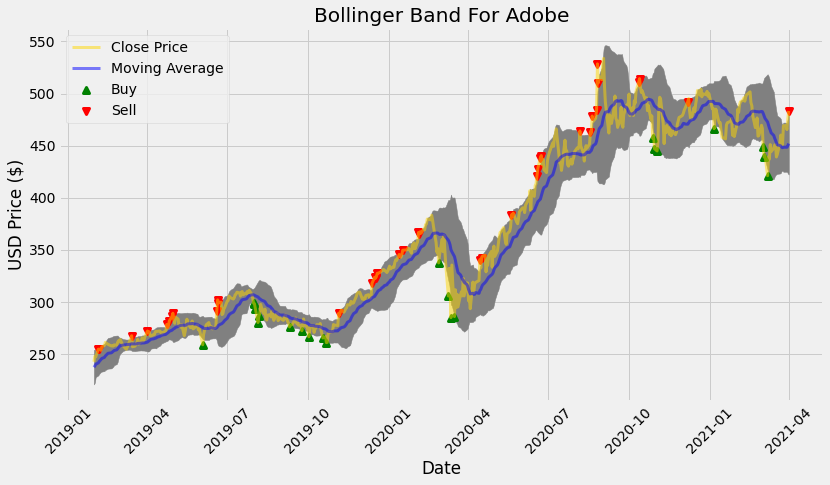

In [43]:
#Plot all of the data
#Get the figure and the figure size
fig = plt.figure(figsize=(12.2,6.4)) #width = 12.2 inches and height = 6.4 inches
#Add the subplot
ax = fig.add_subplot(1,1,1) #Number of rows, cols, & index
# Get the index values of the DataFrame
x_axis = new_df.index
# Plot and shade the area between the upper band and the lower band Grey
ax.fill_between(x_axis, new_df['Upper'], new_df['Lower'], color='grey')
# Plot the Closing Price and Moving Average
ax.plot(x_axis, new_df['Close'], color='gold', lw=3, label = 'Close Price',alpha = 0.5)
ax.plot(x_axis, new_df['SMA'], color='blue', lw=3, label = 'Moving Average',alpha = 0.5)
ax.scatter(x_axis, new_df['Buy'] , color='green', lw=3, label = 'Buy',marker = '^', alpha = 1)
ax.scatter(x_axis, new_df['Sell'] , color='red', lw=3, label = 'Sell',marker = 'v', alpha = 1)
# Set the Title & Show the Image
ax.set_title('Bollinger Band For Adobe')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show();